In [3]:
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt

In [1]:
import rasterio
import numpy as np

FILE_PATH = "vsis3/WYVERN_AVIRISCALI_20191009t183852_v0_1_0.tiff"

file = rasterio.open(FILE_PATH)
image_array = file.read()  # Leaving band number empty in read operation will read entire raster to array
image_array[image_array == -9999] = np.nan  # Replace NoData values with NaN
# We should now have an array with 3 dimensions: Band, X, Y (or some combination thereof)
print(image_array.shape)
# CHANGE THESE TO THE INDICES OF 750nm AND 705nm BAND IN YOUR FILE
band750 = 23
band705 = 19

# RENDVI calculation
rendvi_array = (image_array[band750] - image_array[band705]) / (image_array[band750] + image_array[band705])


(32, 2239, 1743)


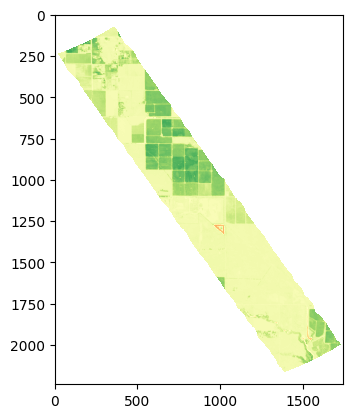

In [5]:
# plot renvi_array
plt.imshow(rendvi_array, vmin=-1, vmax=1, cmap='RdYlGn')

In [37]:
RENDVI_EQUATION = "(b750 - b705) / (b750 + b705)"
VREI2_EQUATION = "(b734 - b747) / (b715 + b726)"
MTVI2_EQUATION = "(1.5 * (1.2 * (b800 - b550) - 2.5 * (b670 - b550))) / sqrt((2 * b800 + 1) ** 2 - (6 * b800 - 5 * sqrt(b670)) - 0.5)"

band_map_dictionary = {
    "b750": 23,
    "b705": 19,
    "b734": 22,
    "b747": 23,
    "b715": 20,
    "b726": 21,
    "b800": 26,
    "b550": 8,
    "b670": 16,
}

In [40]:
import numexpr as ne

rendvi_array = ne.evaluate(RENDVI_EQUATION, local_dict=band_map_dictionary)
vrei2_array = ne.evaluate(VREI2_EQUATION, local_dict=band_map_dictionary)
mtvi_array = ne.evaluate(MTVI2_EQUATION, local_dict=band_map_dictionary)

In [41]:
rendvi_array.shape

()

TypeError: Invalid shape () for image data

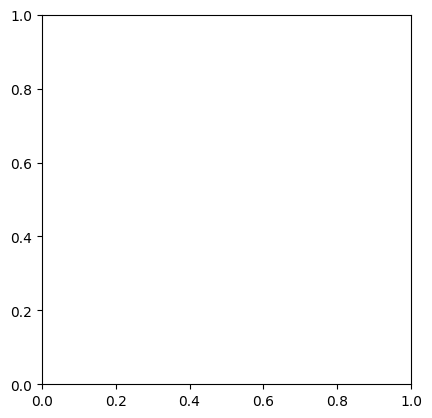

In [29]:
import numpy as np
rendvi_array_np = np.array(rendvi_array)
# plot rendvi_array_np
plt.imshow(vrei2_array, cmap='RdYlGn')
plt.colorbar()
plt.show()